Γεώργιος Παπαϊωαννου - 1115202100222

**Υλοποίηση Α: Κυρτό περίβλημα.**
- Αυξητικό αλγόριθμο

In [1]:
# BASED ON SLIDES [2] PAGE 12 ALGORITHM
def cross_product(o, a, b):
    # CROSS PRODUCT OF OA OB
    return (a[0] - o[0]) * (b[1] - o[1]) - (a[1] - o[1]) * (b[0] - o[0])

def right_turn(p1, p2, p3):
    # RIGHT TURN CHECK W 3 POINTS
    return cross_product(p1, p2, p3) < 0

def incremental_convex_hull(points):
    # STEP 1
    points.sort(key=lambda x: (x[0], x[1]))
    n = len(points)
    
    if n < 3:
        return points  # INVALID
    
    # STEP 2
    upper_hull = [points[0], points[1]]
    
    # STEPS 3-6
    for i in range(2, n):
        upper_hull.append(points[i])
        while len(upper_hull) > 2 and not right_turn(upper_hull[-3], upper_hull[-2], upper_hull[-1]):
            upper_hull.pop(-2)  # POP THE MIDDLE
    
    # STEP 7
    lower_hull = [points[-1], points[-2]]
    
    # STEPS 8-11
    for i in range(n-3, -1, -1):
        lower_hull.append(points[i])
        while len(lower_hull) > 2 and not right_turn(lower_hull[-3], lower_hull[-2], lower_hull[-1]):
            lower_hull.pop(-2)  # POP THE MIDDLE
    
    # STEP 12
    lower_hull.pop(0)
    lower_hull.pop(-1)
    
    # STEP 13
    convex_hull = upper_hull + lower_hull
    
    # STEP 14
    return convex_hull

- Αλγόριθμος περιτυλίγματος

In [2]:
def find_leftmost_point(points): # STEP 1
    return min(points, key=lambda p: (p[0], p[1]))

def distance_squared(a, b):
    return (a[0] - b[0])**2 + (a[1] - b[1])**2

def gift_wrapping_convex_hull(points, cross_product, right_turn):
    if len(points) < 3:
        return points

    hull = [] # STEP 2
    leftmost_point = find_leftmost_point(points) # STEP 1
    current_point = leftmost_point

    while True:
        hull.append(current_point)
        next_point = points[0] if current_point != points[0] else points[1]
        for p in points: # STEP 3
            if p == current_point:
                continue
            # CW(r, u, t)
            if right_turn(current_point, next_point, p) or \
               (cross_product(current_point, next_point, p) == 0 and \
                distance_squared(current_point, p) > distance_squared(current_point, next_point)):
                next_point = p
        current_point = next_point 
        if current_point == leftmost_point: # STEP 4
            break

    return hull



- Αλγόριθμο Διαίρει και Βασίλευε

In [3]:
import random
import matplotlib.pyplot as plt

# GLOBAL VARIABLE TO STORE THE CENTER OF THE POLYGON
center = [0, 0]

# CHECKS WHICH QUADRANT THE POINT BELONGS TO
def get_quadrant(point):
    if point[0] >= 0 and point[1] >= 0:
        return 1
    if point[0] <= 0 and point[1] >= 0:
        return 2
    if point[0] <= 0 and point[1] <= 0:
        return 3
    return 4

# CHECKS THE ORIENTATION OF THE ORDERED TRIPLET (a, b, c) (RIGHT TURN, LEFT TURN, COLLINEAR)
def get_orientation(pt1, pt2, pt3):
    result = (pt2[1] - pt1[1]) * (pt3[0] - pt2[0]) - (pt3[1] - pt2[1]) * (pt2[0] - pt1[0])
    if result == 0: # COLLINEAR
        return 0
    if result > 0:
        return 1 # RIGHT TURN
    return -1 # LEFT TURN

# COMPARE FUNCTION FOR SORTING BASED ON ANGLES FROM THE CENTER POINT
def angle_compare(pt1, pt2):
    p = [pt1[0] - center[0], pt1[1] - center[1]]
    q = [pt2[0] - center[0], pt2[1] - center[1]]
    quadrant_p = get_quadrant(p)
    quadrant_q = get_quadrant(q)
    if quadrant_p != quadrant_q:
        if quadrant_p < quadrant_q:
            return -1 
        return 1 
    if p[1] * q[0] < q[1] * p[0]:
        return -1 
    return 1


# MERGE TWO CONVEX HULLS
def merge_hulls(hull1, hull2):
    len1, len2 = len(hull1), len(hull2)
    idx1, idx2 = 0, 0

    # FIND THE RIGHTMOST POINT OF hull1
    for i in range(1, len1):
        if hull1[i][0] > hull1[idx1][0]:
            idx1 = i

    # FIND THE LEFTMOST POINT OF hull2
    for i in range(1, len2):
        if hull2[i][0] < hull2[idx2][0]:
            idx2 = i

    upper_idx1, upper_idx2 = idx1, idx2
    done = False # FLAG TO CHECK IF THE UPPER TANGENT IS FOUND

    # FIND THE UPPER TANGENT
    while not done:
        done = True
        while get_orientation(hull2[upper_idx2], hull1[upper_idx1], hull1[(upper_idx1 + 1) % len1]) >= 0:
            upper_idx1 = (upper_idx1 + 1) % len1
        while get_orientation(hull1[upper_idx1], hull2[upper_idx2], hull2[(len2 + upper_idx2 - 1) % len2]) <= 0:
            upper_idx2 = (upper_idx2 - 1) % len2
            done = False

    lower_idx1, lower_idx2 = idx1, idx2
    done = False 

    # FIND THE LOWER TANGENT
    while not done:
        done = True
        while get_orientation(hull1[lower_idx1], hull2[lower_idx2], hull2[(lower_idx2 + 1) % len2]) >= 0:
            lower_idx2 = (lower_idx2 + 1) % len2
        while get_orientation(hull2[lower_idx2], hull1[lower_idx1], hull1[(len1 + lower_idx1 - 1) % len1]) <= 0:
            lower_idx1 = (lower_idx1 - 1) % len1
            done = False

    merged_hull = []
    idx = upper_idx1

    # ADD POINTS FROM hull1 BETWEEN upper_idx1 AND lower_idx1
    merged_hull.append(hull1[upper_idx1])
    while idx != lower_idx1:
        idx = (idx + 1) % len1
        merged_hull.append(hull1[idx])

    idx = lower_idx2

    # ADD POINTS FROM hull2 BETWEEN lower_idx2 AND upper_idx2
    merged_hull.append(hull2[lower_idx2])
    while idx != upper_idx2:
        idx = (idx + 1) % len2
        merged_hull.append(hull2[idx])

    return merged_hull

def incremental_convex_hull(points): # MINI INCREMENTAL CONVEX HULL FOR SIMPLICITY
    points = sorted(points)
    if len(points) <= 1:
        return points

    lower = []
    for p in points:
        while len(lower) >= 2 and get_orientation(lower[-2], lower[-1], p) != -1:
            lower.pop()
        lower.append(p)

    upper = []
    for p in reversed(points):
        while len(upper) >= 2 and get_orientation(upper[-2], upper[-1], p) != -1:
            upper.pop()
        upper.append(p)

    return lower[:-1] + upper[:-1]

# MAIN DNC BODY
def divide_and_conquer_convex_hull(points):
    if len(points) <= 5:
        return incremental_convex_hull(points) # BASE CASE: USE INCREMENTAL HULL FOR SMALL INPUTS (FAR END OF RECURSION)

    mid = len(points) // 2 # DIVIDE THE POINTS INTO TWO HALVES
    left_hull = divide_and_conquer_convex_hull(points[:mid]) # RECURSIVE CALL FOR LEFT HALF 
    right_hull = divide_and_conquer_convex_hull(points[mid:]) # RECURSIVE CALL FOR RIGHT HALF

    return merge_hulls(left_hull, right_hull) # MERGE THE TWO HALVES


- Αλγόριθμος QuickHull.

In [4]:
import numpy as np

# FUNCTION TO CALCULATE THE DISTANCE OF POINT P FROM THE LINE FORMED BY POINTS P1 AND P2
def distance_from_line(p1, p2, p):
    p1, p2, p = np.array(p1), np.array(p2), np.array(p)
    return np.abs(np.cross(p2-p1, p1-p)) / np.linalg.norm(p2-p1)

# FUNCTION TO CHECK IF A POINT IS ON THE RIGHT SIDE OF THE LINE FORMED BY POINTS A AND C
def right_side_of_line(A, C, point):
    return (C[0] - A[0]) * (point[1] - A[1]) - (C[1] - A[1]) * (point[0] - A[0]) > 0

# RECURSIVE FUNCTION TO FIND THE CONVEX HULL POINTS USING QUICKHULL ALGORITHM [SLIDE 21]
def QuickHull(A, B, S):
    if not S:
        return [A]  # BASE CASE: IF NO POINTS LEFT, RETURN POINT A
    else:
        # FIND THE POINT C THAT IS FURTHEST FROM THE LINE AB
        C = max(S, key=lambda point: distance_from_line(A, B, point))
        # FIND POINTS THAT ARE ON THE RIGHT SIDE OF THE LINE AC
        M = [point for point in S if right_side_of_line(A, C, point)]
        # FIND POINTS THAT ARE ON THE RIGHT SIDE OF THE LINE CB
        N = [point for point in S if right_side_of_line(C, B, point)]
        # RECURSIVELY FIND THE HULL POINTS AND COMBINE THEM
        return QuickHull(A, C, M) + [C] + QuickHull(C, B, N)

# MAIN QUICKHULL FUNCTION
def quickhull(points):
    # FIND THE LEFTMOST POINT A AND THE RIGHTMOST POINT B
    A = min(points, key=lambda point: point[0])
    B = max(points, key=lambda point: point[0])
    
    S1 = [point for point in points if right_side_of_line(A, B, point)]
    S2 = [point for point in points if right_side_of_line(B, A, point)]
    return QuickHull(A, B, S1) + [B] + QuickHull(B, A, S2)

**2.** Θεωρείστε 120 τυχαία σημεία στο επίπεδο σε γενική θέση. Να βρείτε
το κυρτό περίβλημα αυτών των σημείων χρησιμοποιώντας τους παραπάνω
αλγορίθμους. Να παρουσιάσετε τα αποτελέσματα σχηματικά. Υπάρχει
διαφορά στα αποτελέσματα;

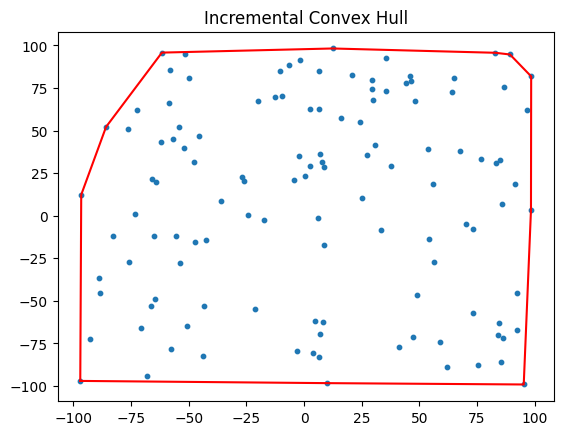

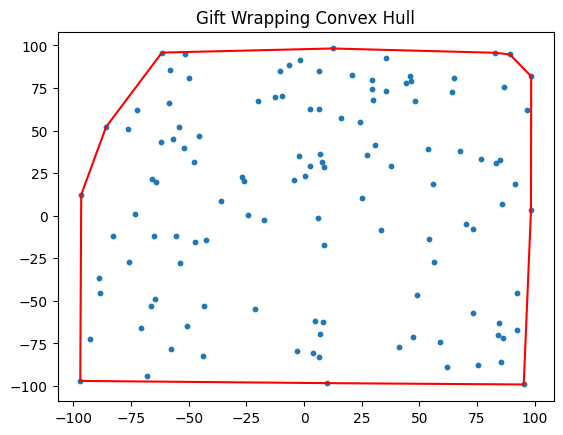

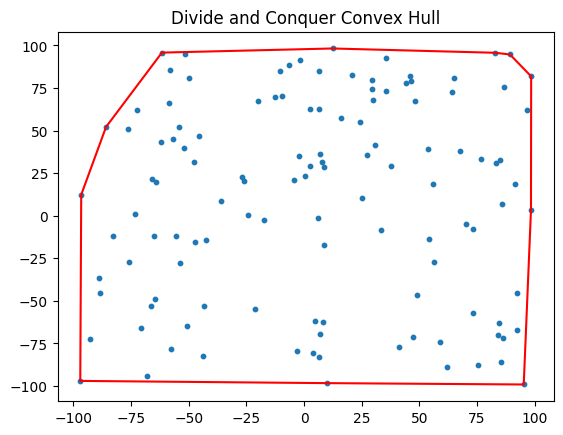

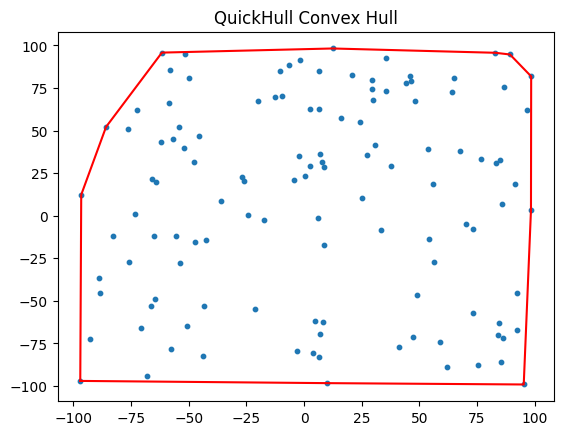

In [5]:
import matplotlib.pyplot as plt
import random

# 120 POINTS
points = [(random.uniform(-100, 100), random.uniform(-100, 100)) for _ in range(120)]

incremental_hull = incremental_convex_hull(points)
gift_wrapping_hull = gift_wrapping_convex_hull(points, cross_product, right_turn)
points.sort() # MUST BE SORTED BY X COORDINATE FOR DNC
divide_and_conquer_hull = divide_and_conquer_convex_hull(points)


# QUICKHULL

A = min(points, key=lambda point: point[0])
B = max(points, key=lambda point: point[0])

S = [point for point in points if point not in [A, B]]

hull_points = quickhull(points)

# PLOTTING FUNCTION
def plot_hull(points, hull, title):
    plt.figure()
    x, y = zip(*points)
    plt.scatter(x, y, s=10)
    hull.append(hull[0])  # CLOSE THE HULL 
    hx, hy = zip(*hull)
    plt.plot(hx, hy, 'r-')
    plt.title(title)
    plt.show()

plot_hull(points, incremental_hull, "Incremental Convex Hull")
plot_hull(points, gift_wrapping_hull, "Gift Wrapping Convex Hull")
plot_hull(points, divide_and_conquer_hull, "Divide and Conquer Convex Hull")
plot_hull(points, hull_points, "QuickHull Convex Hull")

**3.** Να συγκρίνετε τους παραπάνω αλγορίθμους ως προς το χρόνο υλοποίησής
τους (θεωρείστε διάφορα πλήθη σημείων στο επίπεδο και παρουσιάστε
τους χρόνους σε έναν συγκεντρωτικό πίνακα).

In [6]:
import random
import time

# FUNCTION TO GENERATE RANDOM POINTS
def generate_random_points(num_points):
    return [(random.uniform(-100, 100), random.uniform(-100, 100)) for _ in range(num_points)]

# FUNCTION TO TIME AN ALGORITHM (GOOGLE)
def time_algorithm(algorithm, points, *args):
    start_time = time.time()
    algorithm(points, *args)
    end_time = time.time()
    return end_time - start_time

# WRAPPER FUNCTIONS FOR TIMING. WRAPPERS NEEDED FOR SIMPLIFIFICATION OF TIME ALGORITHM FUNCTION CALLS
def incremental_wrapper(points):
    incremental_convex_hull(points)

def gift_wrapping_wrapper(points):
    gift_wrapping_convex_hull(points, cross_product, right_turn)

def divide_and_conquer_wrapper(points):
    points.sort()  # MUST BE SORTED BY X COORDINATE FOR DNC
    divide_and_conquer_convex_hull(points)

def quickhull_wrapper(points):
    quickhull(points)

# LIST OF POINT SIZES TO TEST
point_sizes = [100, 500, 1000, 5000, 10000] 

# DICTIONARY TO STORE RESULTS
results = { # USE DICTIONARY AS TABLE
    "Point Size": [],
    "Incremental Time (s)": [],
    "Gift Wrapping Time (s)": [],
    "Divide and Conquer Time (s)": [],
    "QuickHull Time (s)": []
}

# TEST EACH POINT SIZE
for size in point_sizes:
    points = generate_random_points(size) # GENERATE RANDOM POINTS BASED ON CURRENT SIZE
    
    # TIME INCREMENTAL ALGORITHM
    incremental_time = time_algorithm(incremental_wrapper, points)
    
    # TIME GIFT WRAPPING ALGORITHM
    gift_wrapping_time = time_algorithm(gift_wrapping_wrapper, points)
    
    # TIME DIVIDE AND CONQUER ALGORITHM
    divide_and_conquer_time = time_algorithm(divide_and_conquer_wrapper, points)
    
    # TIME QUICKHULL ALGORITHM
    quickhull_time = time_algorithm(quickhull_wrapper, points)
    
    # STORE RESULTS IN DICTIONARY / TABLE
    results["Point Size"].append(size)
    results["Incremental Time (s)"].append(incremental_time)
    results["Gift Wrapping Time (s)"].append(gift_wrapping_time)
    results["Divide and Conquer Time (s)"].append(divide_and_conquer_time)
    results["QuickHull Time (s)"].append(quickhull_time)

# PRINT RESULTS IN A TABLE-LIKE FORMAT AS A FINAL RESULT
print(f"{'Point Size':<15}{'Incremental Time (s)':<25}{'Gift Wrapping Time (s)':<25}{'Divide and Conquer Time (s)':<30}{'QuickHull Time (s)':<25}") # HEADER
print("-" * 120) # SEPARATOR LINE
for i in range(len(results["Point Size"])): # PRINT EACH ROW
    print(f"{results['Point Size'][i]:<15}{results['Incremental Time (s)'][i]:<25}{results['Gift Wrapping Time (s)'][i]:<25}{results['Divide and Conquer Time (s)'][i]:<30}{results['QuickHull Time (s)'][i]:<25}") 

Point Size     Incremental Time (s)     Gift Wrapping Time (s)   Divide and Conquer Time (s)   QuickHull Time (s)       
------------------------------------------------------------------------------------------------------------------------
100            0.0                      0.0010170936584472656    0.0                           0.004551410675048828     
500            0.0009999275207519531    0.003998994827270508     0.001001596450805664          0.023012876510620117     
1000           0.002008676528930664     0.011533975601196289     0.003998517990112305          0.042999267578125        
5000           0.010991334915161133     0.07554483413696289      0.015000343322753906          0.19612574577331543      
10000          0.02099919319152832      0.13207483291625977      0.030999422073364258          0.39474940299987793      


**Υλοποίηση Β: Γραμμικός Προγραμματισμός.**
- **1.** Να υλοποιήσετε τον αυξητικό αλγόριθμο για την επίλυση ενός προβλήματος γραμμικού προγραμματισμού στο επίπεδο.


In [7]:
import numpy as np
from scipy.optimize import linprog # USE LINPROG FUNCTION FROM SCIPY 

def incremental_linear_programming(c, A, b):
    num_constraints, num_variables = A.shape
    C = []  # ACTIVE SET OF CONSTRAINTS
    
    for i in range(num_constraints):
        # ADD THE I-TH CONSTRAINT TO THE ACTIVE SET
        C.append(i)
        
        # SOLVE FOR THE CURRENT SET OF ACTIVE CONSTRAINTS
        A_active = A[C]
        b_active = b[C]

        # ATTEMPT TO SOLVE THE PROBLEM USING LINPROG READY TO USE FUNC
        result = linprog(c, A_ub=A_active, b_ub=b_active, method='highs')
        
        if result.success:
            x_star = result.x
        else:
            # PRINT ERROR MESSAGE IF PROBLEM IS INFEASIBLE
            print(f"Problem with constraints up to {i + 1}: {result.message}")
            return None

        # CHECK FEASIBILITY FOR ALL CONSTRAINTS
        for j in range(i):
            if np.dot(A[j], x_star) > b[j]:
                # PRINT ERROR MESSAGE IF SOLUTION IS INFEASIBLE
                print(f"Infeasible solution found at constraint: {j + 1}")
                return None

    return x_star

- **2.** Στο ακόλουθο πρόβλημα γραμμικού προγραμματισμού, να παραστήσετε
γραφικά την εφικτή περιοχή και να το λύσετε χρησιμοποιώντας τον αυξητικό αλγόριθμο που έχετε υλοποιήσει:

Optimal solution: [3.5 0.5]
Optimal value: 23.5


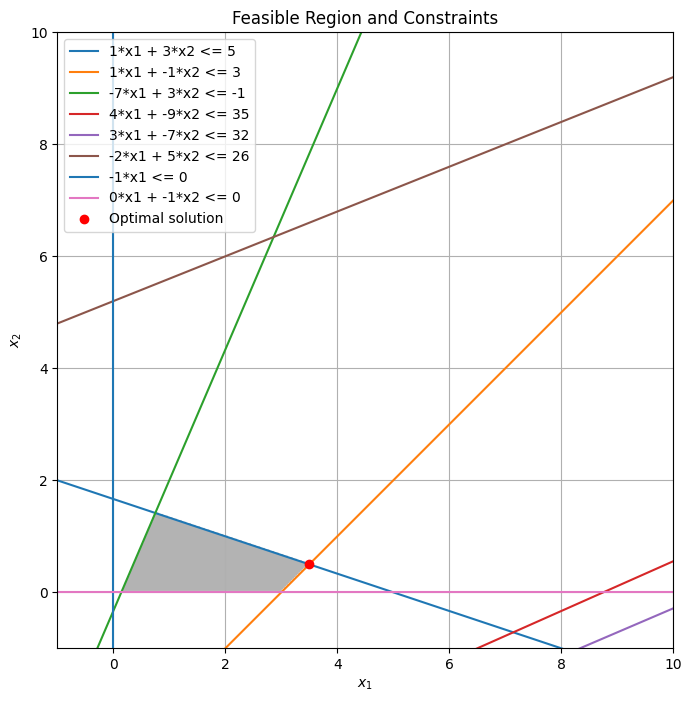

In [8]:
import numpy as np
import matplotlib.pyplot as plt

c = np.array([-5, -12])  # MAXIMIZATION VALUES
A = np.array([
    [1, 3],      # x1 + 3x2 <= 5
    [1, -1],     # x1 - x2 <= 3 (converted from -x1 + x2 >= -3)
    [-7, 3],     # -7x1 + 3x2 <= -1 (converted from 7x1 - 3x2 >= 1)
    [4, -9],     # 4x1 - 9x2 <= 35
    [3, -7],     # 3x1 - 7x2 <= 32
    [-2, 5],     # -2x1 + 5x2 <= 26
    [-1, 0],     # x1 >= 0 becomes -x1 <= 0
    [0, -1]      # x2 >= 0 becomes -x2 <= 0
])
b = np.array([5, 3, -1, 35, 32, 26, 0, 0]) 

optimal_solution = incremental_linear_programming(c, A, b)
if optimal_solution is not None:
    print("Optimal solution:", optimal_solution)
    print("Optimal value:", -np.dot(c, optimal_solution))  # NEGATION FOR MAXIMIZATION
else:
    print("No feasible solution found.")

# FEASIBLE REGION PLOT
x1 = np.linspace(-1, 10, 400)
x2 = np.linspace(-1, 10, 400)
X1, X2 = np.meshgrid(x1, x2)

constraints = [ # DEFINE CONSTRAINTS
    (X1 + 3 * X2 <= 5),
    (-X1 + X2 >= -3),
    (7 * X1 - 3 * X2 >= 1),  
    (4 * X1 - 9 * X2 <= 35),
    (3 * X1 - 7 * X2 <= 32),
    (-2 * X1 + 5 * X2 <= 26),
    (X1 >= 0),
    (X2 >= 0)
]

feasible_region = np.ones_like(X1, dtype=bool)
for constraint in constraints:
    feasible_region &= constraint

plt.figure(figsize=(10, 8))
plt.imshow(feasible_region, extent=(-1, 10, -1, 10), origin='lower', cmap='Greys', alpha=0.3)

# PLOT THE CONSTRAINTS
for i in range(len(A)):
    if A[i][1] != 0:
        x2_vals = (b[i] - A[i][0] * x1) / A[i][1]
        plt.plot(x1, x2_vals, label=f'{A[i][0]}*x1 + {A[i][1]}*x2 <= {b[i]}')
    else:
        plt.axvline(x=b[i] / A[i][0], label=f'{A[i][0]}*x1 <= {b[i]}')

if optimal_solution is not None:
    plt.plot(optimal_solution[0], optimal_solution[1], 'ro', label='Optimal solution')  

plt.title('Feasible Region and Constraints')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.xlim(-1, 10)
plt.ylim(-1, 10)
plt.grid(True)
plt.legend()
plt.show()

**Υλοποίηση Γ: Διάγραμμα Voronoi - Τριγωνοποίηση Delaunay**

- **1.** Να απεικονίσετε την αντιστοιχία ανάμεσα στην τριγωνοποίηση Delaunay
και στο διάγραμμα Voronoi για το P με n της επιλογής σας.

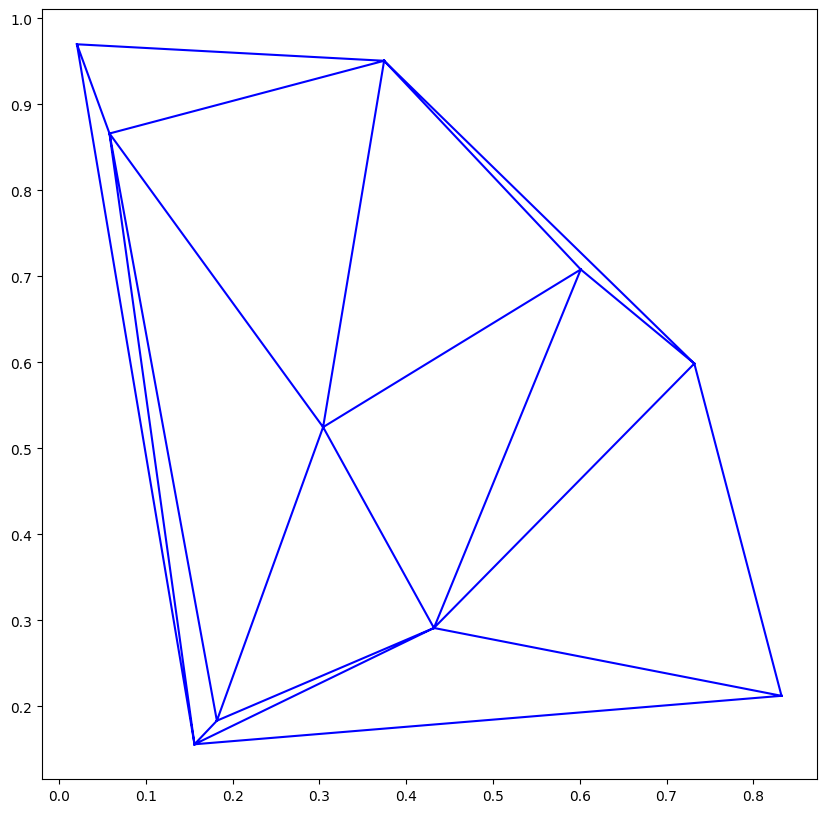

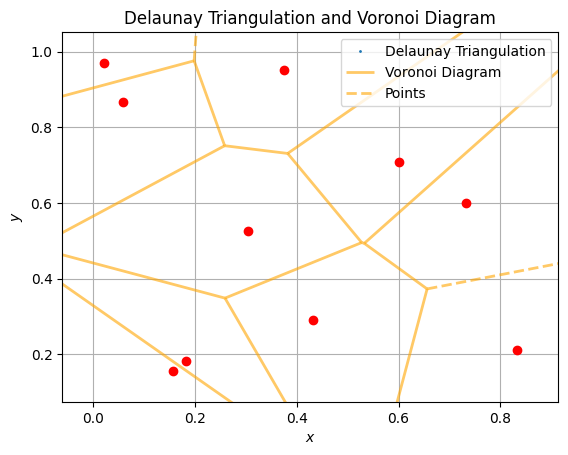

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import Delaunay, Voronoi, voronoi_plot_2d

#GENERATE RANDOM POINTS
np.random.seed(42)  # FOR REPRODUCIBILITY
n = 10  # NUMBER OF POINTS
points = np.random.rand(n, 2)

delaunay = Delaunay(points)

voronoi = Voronoi(points)

# PLOT BOTH DIAGRAMS
plt.figure(figsize=(10, 10))

# PLOT DELAUNAY TRIANGULATION
plt.triplot(points[:, 0], points[:, 1], delaunay.simplices, color='blue', label='Delaunay Triangulation')

# PLOT VORONOI DIAGRAM
voronoi_plot_2d(voronoi, show_vertices=False, line_colors='orange', line_width=2, line_alpha=0.6, point_size=2)

# PLOT POINTS
plt.plot(points[:, 0], points[:, 1], 'o', color='red')

# ADD LABELS AND LEGEND
plt.title('Delaunay Triangulation and Voronoi Diagram')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend(['Delaunay Triangulation', 'Voronoi Diagram', 'Points'])
plt.grid(True)
plt.show()

- **2.** Να σχολιάσετε την πολυπλοκότητα των αλγορίθμων. Πώς επηρεάζει την
πολυπλοκότητα το πλήθος n των σημείων;

**Τριγωνοποίηση Delaunay:**
Ο αλγόριθμος τριγωνοποίησης Delaunay υπολογίζει μια τριγωνοποίηση τέτοια ώστε κανένα σημείο να μην βρίσκεται μέσα στον περιγεγραμμένο κύκλο οποιουδήποτε τριγώνου. Η χρονική πολυπλοκότητα του αλγορίθμου τριγωνοποίησης Delaunay είναι (O(n log n)) για τις περισσότερες πρακτικές υλοποιήσεις. Αυτή η πολυπλοκότητα προκύπτει επειδή ο αλγόριθμος συνήθως περιλαμβάνει την ταξινόμηση των σημείων (που απαιτεί (O(n log n))) και στη συνέχεια την κατασκευή της τριγωνοποίησης, η οποία μπορεί να γίνει σε γραμμικό χρόνο σε σχέση με τον αριθμό των σημείων. Καθώς αυξάνεται ο αριθμός των σημείων (n), ο χρόνος που απαιτείται για τον υπολογισμό της τριγωνοποίησης Delaunay αυξάνεται λογαριθμικά. Αυτό σημαίνει ότι ο διπλασιασμός του αριθμού των σημείων θα έχει ως αποτέλεσμα λιγότερο από διπλάσιο αύξηση στον χρόνο υπολογισμού. \
\
**Διάγραμμα Voronoi**
Ο αλγόριθμος διαγράμματος Voronoi υπολογίζει μια διαμέριση του επιπέδου σε περιοχές με βάση την απόσταση από ένα συγκεκριμένο σύνολο σημείων. Κάθε περιοχή περιέχει όλα τα σημεία που είναι πιο κοντά σε ένα συγκεκριμένο σημείο από οποιοδήποτε άλλο. Η χρονική πολυπλοκότητα της κατασκευής ενός διαγράμματος Voronoi είναι επίσης (O(n log n)). Αυτό συμβαίνει επειδή το διάγραμμα Voronoi μπορεί να προκύψει από την τριγωνοποίηση Delaunay, η οποία έχει την ίδια πολυπλοκότητα. Η κατασκευή περιλαμβάνει την ταξινόμηση των σημείων και στη συνέχεια τον υπολογισμό του διαγράμματος, που μπορεί να γίνει αποδοτικά. Όπως και στην τριγωνοποίηση Delaunay, ο χρόνος που απαιτείται για τον υπολογισμό του διαγράμματος Voronoi αυξάνεται λογαριθμικά με τον αριθμό των σημείων (n). 


**Υλοποίηση Δ: Γεωμετρική αναζήτηση**

- **1.** ΄Εστω P ένα σύνολο n σημείων στο επίπεδο. Να υλοποιήσετε έναν αλγόριθμο κατασκευής του αντίστοιχου range tree για το P.


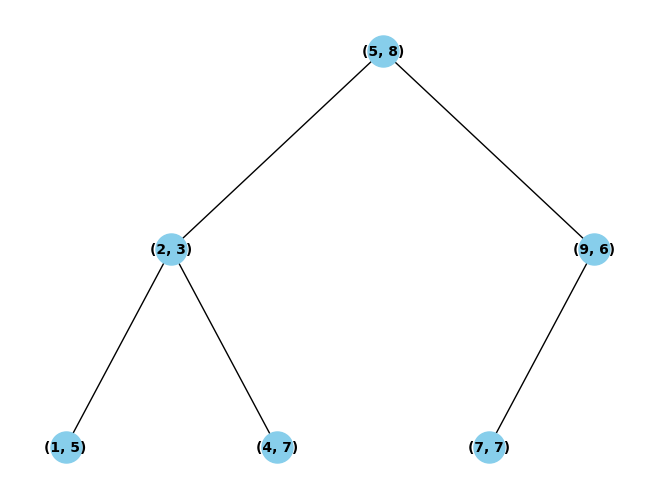

In [10]:
import matplotlib.pyplot as plt
import networkx as nx

# DEFINE THE NODE CLASS
class Node:
    def __init__(self, point, left=None, right=None):
        self.point = point  # STORE THE POINT (x, y)
        self.left = left
        self.right = right
        self.T = None  # AUXILIARY BST

# FUNCTION TO CONSTRUCT THE RANGE TREE
def construct_range_tree(P):
    # STEP 1: CREATE AN AUXILIARY STRUCTURE
    T = sorted(P)  # SORT POINTS BY X-COORDINATE

    # STEPS 2-4: BASE CASE AND RECURSIVE CASE
    def build_tree(T):
        if not T:
            return None

        mid = len(T) // 2
        root = Node(T[mid])  # STEP 3: CREATE A LEAF NODE WITH THE POINT

        # STEP 1: CREATE AN AUXILIARY STRUCTURE FOR THE CURRENT NODE
        root.T = T

        # STEP 4: DIVIDE INTO SUBSETS
        root.left = build_tree(T[:mid])  # STEP 5: RECURSIVE CALL FOR LEFT SUBTREE
        root.right = build_tree(T[mid+1:])  # STEP 6: RECURSIVE CALL FOR RIGHT SUBTREE

        return root

    return build_tree(T)

# FUNCTION TO ADD EDGES TO THE GRAPH
def add_edges(G, root, parent=None, pos=None, x=0, y=0, layer=1):
    if root:
        G.add_node(root.point, label=str(root.point), pos=(x, y))
        if parent:
            G.add_edge(parent.point, root.point)
        # POSITION CHILDREN NODES
        if root.left:
            add_edges(G, root.left, root, pos, x - 1 / layer, y - 1, layer + 1)
        if root.right:
            add_edges(G, root.right, root, pos, x + 1 / layer, y - 1, layer + 1)

# FUNCTION TO VISUALIZE THE RANGE TREE
def visualize_range_tree(root):
    G = nx.DiGraph()
    add_edges(G, root)
    pos = nx.get_node_attributes(G, 'pos')
    labels = nx.get_node_attributes(G, 'label')
    nx.draw(G, pos, with_labels=True, labels=labels, node_size=500, node_color="skyblue", font_size=10, font_weight="bold", arrows=False)
    plt.show()

# GENERATE INTEGER POINTS
points = [
    (2, 3), (5, 8), (7, 7), (9, 6), (4, 7), (1, 5)
]

# CREATE THE RANGE TREE
root = construct_range_tree(points)

# VISUALIZE THE RANGE TREE
visualize_range_tree(root)

- **2.** Να γίνει οπτικοποίηση των βημάτων κατασκευής του range tree για λίγα
σημεία στο επίπεδο που θα επιλέξετε εσείς.


- Ταξινόμηση Σημείων: Ταξινόμηση των σημείων κατά την x-συντεταγμένη: (1, 5), (2, 3), (4, 7), (5, 8), (7, 2), (9, 6).
- Δημιουργία Ρίζας: Επιλέγουμε το μεσοδιανυσματικό σημείο (5, 8) ως ρίζα του δέντρου.

![alt text](STEP1.png)

- Αριστερό Υποδέντρο: \
Εξετάξουμε τα σημεία αριστερά της ρίζας: (1, 5), (2, 3), (4, 7). \
Επιλέγουμε το μεσοδιανυσματικό σημείο (2, 3) ως ρίζα του αριστερού υποδέντρου.
Το (1, 5) γίνεται αριστερό παιδί του (2, 3).
Το (4, 7) γίνεται δεξιό παιδί του (2, 3).

![alt text](STEP2.png)

- Δεξί Υποδέντρο: \
Εξετάξουμε τα σημεία δεξιά της ρίζας: (9, 6), (7, 7). \
Επιλέγουμε το σημείο (9, 6) ως ρίζα του δεξιου υποδέντρου.
Το (7, 7) γίνεται αριστερό παιδί του (9, 6).

Ωστε έχουμε το τελικό αποτέλεσμα.

- **3.** Να υλοποιήσετε έναν αλγόριθμο ορθογώνιας γεωμετρικής αναζήτησης
που στηρίζεται στο range tree που έχετε κατασκευάσει για το σύνολο
σημείων P.

In [45]:
def range_query(node, x_low, x_high, y_low, y_high):
    result = []

    # STEP 1: FIND THE SPLIT NODE
    def find_split_node(node, x_low, x_high):
        while node and (x_high < node.point[0] or x_low > node.point[0]):
            if x_high < node.point[0]:
                node = node.left
            elif x_low > node.point[0]:
                node = node.right
        return node

    split_node = find_split_node(node, x_low, x_high)

    if split_node is None:
        return result

    # STEP 2: IF THE SPLIT NODE IS A LEAF
    if split_node.left is None and split_node.right is None:
        # STEP 3: CHECK IF THE POINT STORED IN THE SPLIT NODE IS WITHIN RANGE
        if x_low <= split_node.point[0] <= x_high and y_low <= split_node.point[1] <= y_high:
            result.append(split_node.point)
    else:
        # STEP 4-8: TRAVERSE THE LEFT SUBTREE
        if split_node.left:
            result += range_query(split_node.left, x_low, x_high, y_low, y_high)

        # STEP 9-13: TRAVERSE THE RIGHT SUBTREE
        if split_node.right:
            result += range_query(split_node.right, x_low, x_high, y_low, y_high)

    return result

- **4.** Θεωρείστε ένα σύνολο P 120 σημείων στο επίπεδο και μία ορθογώνια
έκταση. Εφαρμόζοντας τον αλγόριθμο που έχετε υλοποιήσει να απαντήσετε στο ερώτημα ποια από τα σημεία του P βρίσκονται εντός της
ορθογώνιας έκτασης (σχηματικά και λίστα σημείων).


Points within the rectangle: [(0.3261702541282535, 0.46855699459113465), (0.33217252206173253, 0.7008084180017403), (0.38722314121020696, 0.2827654570600986), (0.3937551415654067, 0.6082113767664467), (0.4255056592718428, 0.565415939752538), (0.4445735010694285, 0.7423699370897818), (0.4490785141348759, 0.5776130806371337), (0.45688807173726687, 0.4751083649318354), (0.4677206159711509, 0.605896815179483), (0.47415794587907967, 0.22578955215062912), (0.4834980851068038, 0.42914949195832186), (0.5023718199720955, 0.3278839940182585), (0.5528148757183491, 0.740663581066626), (0.5592181317684581, 0.5147421937567799), (0.5817215274734767, 0.7663472131046524), (0.6007921493396191, 0.7008656972438799), (0.6427774134799279, 0.7176761577934996), (0.6647392049108463, 0.41933468041928834), (0.6766172335525065, 0.363403931999427), (0.6917201141346888, 0.6613426789447244)]
Query rectangle: (0.3, 0.7, 0.2, 0.8)


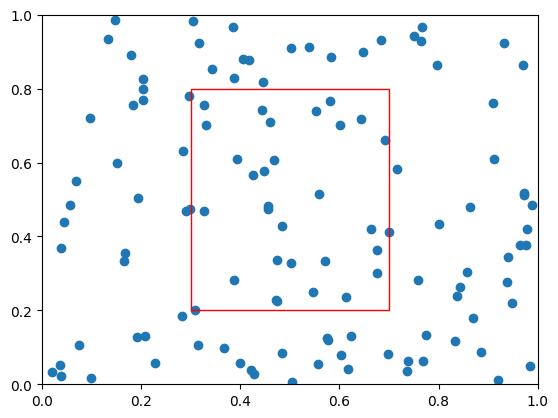

In [46]:
import matplotlib.pyplot as plt
import numpy as np

def visualize_results(points, query_rectangle):
    x, y = zip(*points)
    plt.scatter(x, y)

    # PRINT THE QUERY RECTANGLE TO DOUBLE CHECK
    print("Query rectangle:", query_rectangle)

    rect = plt.Rectangle((query_rectangle[0], query_rectangle[2]),
                         query_rectangle[1] - query_rectangle[0],
                         query_rectangle[3] - query_rectangle[2],
                         fill=False, edgecolor='red')
    plt.gca().add_patch(rect)

    # ADJUST PLOT LIMITS TO ENSURE THE RECTANGLE AND POINTS ARE VISIBLE
    plt.xlim(0, 1)  # ASSUMING POINTS ARE WITHIN [0, 1]
    plt.ylim(0, 1)

    plt.show()

# GENERATE RANDOM POINTS
num_points = 120
points = [(np.random.rand(), np.random.rand()) for _ in range(num_points)]

# CREATE THE RANGE TREE
root = construct_range_tree(points)

# DEFINE THE QUERY RECTANGLE (xmin, xmax, ymin, ymax)
query_rectangle = (0.3, 0.7, 0.2, 0.8)

# PERFORM THE RANGE QUERY
points_in_rectangle = range_query(root, query_rectangle[0], query_rectangle[1], query_rectangle[2], query_rectangle[3])
print("Points within the rectangle:", points_in_rectangle)

# VISUALIZE THE RESULTS
visualize_results(points, query_rectangle)